In [4]:
import sys
sys.path.append("/scratch/m/murray/dtolgay/")
from tools import functions_readfiles as readfiles
from tools import functions_importing_observations as observations

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
plt.style.use("seaborn-poster")

In [5]:
runs = {
    "normal": {
        "label": "unchanged",
        "data": pd.DataFrame(),
        "color": "tab:red",
        "directory": "voronoi_1e6",
    },
    "mstar_doubled": {
        "label": r"$M_{star}$ $\times$ $2$",
        "data": pd.DataFrame(),
        "color": "tab:orange",
        "directory": "mstar_doubled_voronoi_1e6",
    },
    "zstar_doubled": {
        "label": r"$Z_{star}$ $\times$ $2$",        
        "data": pd.DataFrame(),
        "color": "tab:green",
        "directory": "zstar_doubled_voronoi_1e6",        
    },    
}


galaxy_name = "m12i_res7100_md"
galaxy_type = "zoom_in"
redshift = "0.0"
file_name = "L_line_smoothingLength_hybridInterpolator_flux2Luminosity.txt"
base_dir = "/home/m/murray/dtolgay/scratch/post_processing_fire_outputs/skirt/runs_hden_radius"

for run in runs.keys():
    runs[run]["data"] = readfiles.read_interpolated_Lline(
        galaxy_name = galaxy_name, 
        galaxy_type = galaxy_type, 
        redshift = redshift, 
        directory_name = runs[run]["directory"], 
        file_name = file_name,
        base_dir = base_dir,
    )[0] # Returns gas_df and line_names

# Import observations 

In [6]:
XCOLDGASS_df, PHIBBS2_df, ALMA_df, Leroy_df = observations.read_CO_observations(base_dir = "/home/m/murray/dtolgay/Observations")

I am in the function XCold_Gass_data_reading
I am in the function PHIBSS2_data_reading
I am in the function ALMA_2019_Data_Reading
I am in the function Leroy_data_reading
average_radius_r25_times_075_LEROY:  8.886206896551723


# Plotting

In [7]:
XCOLDGASS_df.keys()

Index(['Id', 'Lco', 'Xco', 'Mh2', 'SFR', 'metallicity', 'FLAG_CO', 'Mstar'], dtype='object')

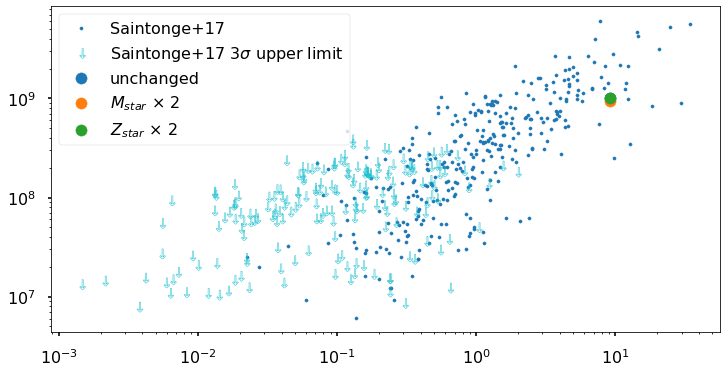

In [8]:
plt.figure(figsize=(12,6))

cond_FLAG_1 = (XCOLDGASS_df["FLAG_CO"] == 1).astype(bool)
cond_FLAG_2 = (XCOLDGASS_df["FLAG_CO"] == 2).astype(bool)
plt.scatter(
    XCOLDGASS_df.loc[cond_FLAG_1, 'SFR'], XCOLDGASS_df.loc[cond_FLAG_1, 'Lco'], 
    facecolors='tab:blue', edgecolors='tab:blue', label="Saintonge+17", s=10,
)
plt.scatter(
    XCOLDGASS_df.loc[cond_FLAG_2, 'SFR'], XCOLDGASS_df.loc[cond_FLAG_2, 'Lco'], 
    marker=r"$\downarrow$", s=100, facecolors='none', edgecolors='tab:cyan', label=r"Saintonge+17 3$\sigma$ upper limit"
)

for run in runs.keys():
    plt.scatter(
        sum(runs[run]["data"]["sfr"]),
        sum(runs[run]["data"]["L_co_10"]),
        label = runs[run]["label"],
    )
    
plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.show()

# ISRF 

In [ ]:
for run_name in 